## 1. Problem definition

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

## 2. Data

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

There are 2 main datasets:
* train.csv - the training set
* test.csv - the test set

## 3. Evaluation

Submissions are evaluated on `Root-Mean-Squared-Error (RMSE)` between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

Submissions must be in the format of the sample file. The file should contain a header and have the following format:
* sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

`Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.`

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view it here [dataset description](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=data_description.txt) using the data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv("data/train.csv")

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df.shape # 1460 rows and 81 columns/features

(1460, 81)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# check for missing values
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
# Check if we have missing values in our dataset (columns with 100% of values missing)
print('No missing values in our dataset!' if sum(df.isnull().sum()) 
      else 'We have missing values in our dataset :-()')

No missing values in our dataset!


In [10]:
# select all categorical columns/features in our dataset
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
# Number of categorical columns/features in our dataset is 43 out of 81
len(df.select_dtypes(include='object').columns)

43

In [12]:
# select all numerical columns/features in our dataset
df.select_dtypes(include=['float64', 'int64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
# number of numerical columns/features in our dataset
len(df.select_dtypes(include=['float64', 'int64']).columns)

38

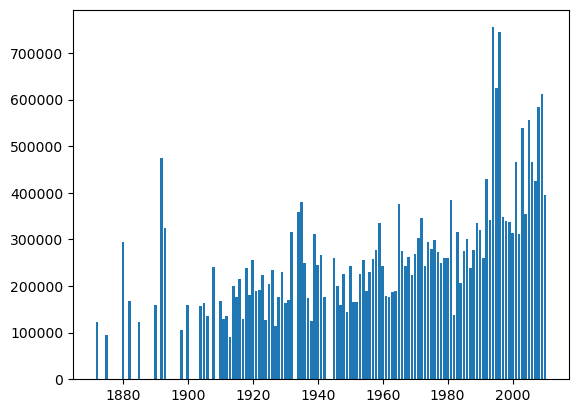

In [14]:
fig, ax = plt.subplots()
ax.bar(df["YearBuilt"], df["SalePrice"]); 
# newer houses tend to cost more (are prices adjusted to inflation?)

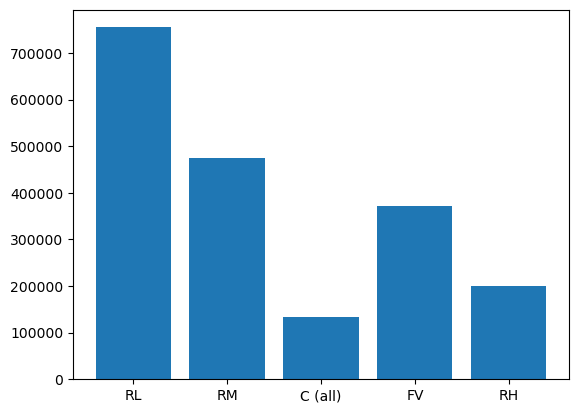

In [15]:
fig, ax = plt.subplots()
ax.bar(df["MSZoning"], df["SalePrice"]); 
# low population density areas cost more:
# 1. RL == Residential Low Density
# 2. RM = Residential Medium Density
# 3. FV == Floating Village Residential
# ...

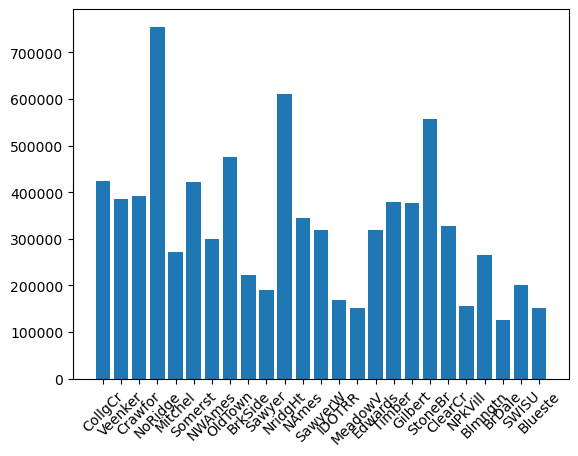

In [16]:
fig, ax = plt.subplots()
ax.bar(df["Neighborhood"], df["SalePrice"]);
plt.xticks(rotation=45);
# some neighborhoods are a lot more expensive than others \ 
# and cost up to 3-4x above the mean:
# 1. Crawfor
# 2. Sawyer
# 3. Gilbert
# ...

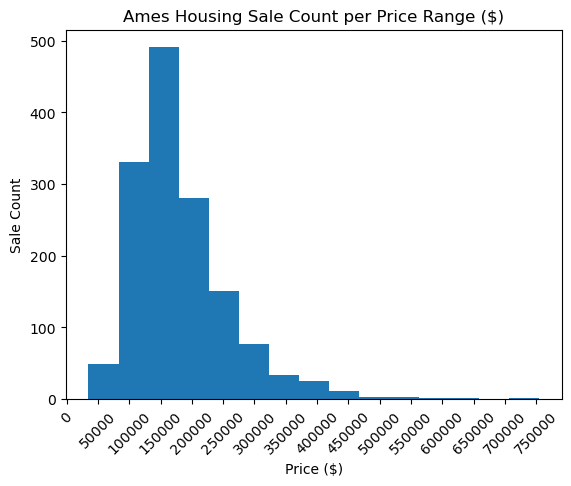

In [17]:
df.SalePrice.plot.hist(bins=15)
plt.xlabel("Price ($)")
plt.ylabel("Sale Count")
plt.title("Ames Housing Sale Count per Price Range ($)")
plt.xticks(ticks = np.arange(0, 800000, 50000), rotation=45);
# most sale prices are in the 150k - 200k $ price range

In [18]:
print(f"The mean sale price for houses in Ames is ${df.SalePrice.mean():.2f}")

The mean sale price for houses in Ames is $180921.20


### Dealing with Missing (null) Values

In [19]:
# check for null values in our df
df.isnull().values.any() 

True

In [20]:
# number of null values in our df
df.isnull().values.sum()

6965

In [21]:
# getting the columns with null values
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [22]:
# Null values count per column
# https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe
columns_null_values = df[df.columns[df.isnull().any()]].isnull().sum()
columns_null_values

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [23]:
# Percentage % of null values per column
# https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe
columns_null_values * 100 / df.shape[0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [24]:
df.shape

(1460, 81)

In [25]:
df.MoSold[:10], df.YrSold[:10]

(0     2
 1     5
 2     9
 3     2
 4    12
 5    10
 6     8
 7    11
 8     4
 9     1
 Name: MoSold, dtype: int64,
 0    2008
 1    2007
 2    2008
 3    2006
 4    2008
 5    2009
 6    2007
 7    2009
 8    2008
 9    2008
 Name: YrSold, dtype: int64)

### Check the values of different columns


In [26]:
# MSZoning: Identifies the general zoning classification of the sale.
#        A	Agriculture
#        C	Commercial
#        FV	Floating Village Residential
#        I	Industrial
#        RH	Residential High Density
#        RL	Residential Low Density
#        RP	Residential Low Density Park 
#        RM	Residential Medium Density
df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [27]:
# MSSubClass: Identifies the type of dwelling involved in the sale.	
#         20	1-STORY 1946 & NEWER ALL STYLES
#         30	1-STORY 1945 & OLDER
#         40	1-STORY W/FINISHED ATTIC ALL AGES
#         45	1-1/2 STORY - UNFINISHED ALL AGES
#         50	1-1/2 STORY FINISHED ALL AGES
#         60	2-STORY 1946 & NEWER
#         70	2-STORY 1945 & OLDER
#         75	2-1/2 STORY ALL AGES
#         80	SPLIT OR MULTI-LEVEL
#         85	SPLIT FOYER
#         90	DUPLEX - ALL STYLES AND AGES
#        120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
#        150	1-1/2 STORY PUD - ALL AGES
#        160	2-STORY PUD - 1946 & NEWER
#        180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
#        190	2 FAMILY CONVERSION - ALL STYLES AND AGES
# sort by the count of house/dwelling type in desc order
df.MSSubClass.value_counts().sort_values()[::-1]

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

## Modeling

In [28]:
# Create a backup of our dataset
df_tmp = df.copy()

In [29]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                             )
# model.fit(df.drop("SalePrice", axis=1), df.SalePrice)

# This won't work just yet because we have objects/non-numeric-data in our dataset
# ValueError: could not convert string to float: 'RL'

### Convert strings to categories


In [30]:
# Check if a feature is non-numerical type
pd.api.types.is_string_dtype(df_tmp["MSZoning"])

True

In [31]:
# # Find the columns containing non-numeric-data
# for label, content in df_tmp.items():
#     if pd.api.types.is_string_dtype(content):
#         print(label)

In [32]:
# Convert all non-numeric-data/strings into categorical values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [33]:
# # Check dataset again -> no more objects (strings) values present
# df_tmp.info()

In [34]:
# Check the created categories for one feature (label)
df_tmp.MSZoning.cat.categories

Index(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype='object')

In [35]:
df_tmp.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Thanks to `pandas categories` we now have a way to access all of our data in the form of numbers.

But we still have a bunch of `missing data`.

### Check missing data

In [36]:
# Percentage of missing values per feature - Method #1
df_tmp.isnull().sum().sort_values()[::-1] * 100 /len(df_tmp)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
                   ...    
CentralAir        0.000000
SaleCondition     0.000000
Heating           0.000000
TotalBsmtSF       0.000000
Id                0.000000
Length: 81, dtype: float64

In [37]:
# Percentage of missing values per feature - Method #2
columns_null_values = df_tmp[df_tmp.columns[df_tmp.isnull().any()]].isnull().sum().sort_values()[::-1]
columns_null_values * 100 / df_tmp.shape[0]

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

### Save preprocessed data

In [38]:
# Export current df_tmp DataFrame
df_tmp.to_csv("data/train_tmp.csv",
              index=False)

In [39]:
# Import preprocessed data
df_tmp = pd.read_csv("data/train_tmp.csv")

In [40]:
df_tmp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Fill missing values

#### Fill numerical missing values first

In [41]:
# Find the columns which contain numeric data
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [42]:
# Check which numeric features have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LotFrontage
MasVnrArea
GarageYrBlt


In [43]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with the median
            df_tmp[label] = content.fillna(content.median())

In [44]:
# Check if there's any numeric features that have null values left
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [45]:
df_tmp.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_is_missing,MasVnrArea_is_missing,GarageYrBlt_is_missing
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,8,2007,WD,Normal,175000,False,False,False
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2010,WD,Normal,210000,False,False,False
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,Shed,2500,5,2010,WD,Normal,266500,False,False,False
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,4,2010,WD,Normal,142125,False,False,False
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,6,2008,WD,Normal,147500,False,False,False


In [46]:
# Check to see how many examples were missing
df_tmp.LotFrontage_is_missing.value_counts(),\
df_tmp.MasVnrArea_is_missing.value_counts(),\
df_tmp.GarageYrBlt_is_missing.value_counts()

(False    1201
 True      259
 Name: LotFrontage_is_missing, dtype: int64,
 False    1452
 True        8
 Name: MasVnrArea_is_missing, dtype: int64,
 False    1379
 True       81
 Name: GarageYrBlt_is_missing, dtype: int64)

In [47]:
# Check what other missing values we have in our DataFrame
df_tmp.isna().sum().sort_values()[::-1]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
                ... 
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Id                 0
Length: 84, dtype: int64

#### Filling and turning categorical variables into numbers

In [48]:
# check the columns which aren't numeric
# values that are positive for .isna() count as not numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [49]:
# Turn categorical values into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column to indicate whether sample had missing values
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes + 1

In [50]:
pd.Categorical(df_tmp["MSZoning"])

[4, 4, 4, 4, 4, ..., 4, 4, 4, 4, 4]
Length: 1460
Categories (5, int64): [1, 2, 3, 4, 5]

In [51]:
df_tmp.tail().T

,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,4,4,4,4,4
LotFrontage,62.0,85.0,66.0,68.0,75.0
LotArea,7917,13175,9042,9717,9937
...,...,...,...,...,...
PoolQC_is_missing,True,True,True,True,True
Fence_is_missing,True,False,False,True,True
MiscFeature_is_missing,True,True,False,True,True
SaleType_is_missing,False,False,False,False,False


In [52]:
# we use +1 to avoid having negative values in our DataFrame
# df_tmp[label] = pd.Categorical(content).codes + 1
# missing values -1 have +1 added to them, thus missing values become 0 \
# and all of our other values become categorical numeric values + 1

In [53]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 127 entries, Id to SaleCondition_is_missing
dtypes: bool(46), float64(3), int64(35), int8(43)
memory usage: 560.5 KB


In [54]:
# One last check -> are there any missing values left?
df_tmp.isna().sum().sort_values()[::-1]

SaleCondition_is_missing    0
GrLivArea                   0
BsmtFinType1                0
BsmtFinSF1                  0
BsmtFinType2                0
                           ..
Utilities_is_missing        0
LotConfig_is_missing        0
LandSlope_is_missing        0
Neighborhood_is_missing     0
Id                          0
Length: 127, dtype: int64

`No missing values left in our df_tmp train DataFrame! Hoo-ray!`

Now that all of our data is numeric as well as our DataFrame has no missing values, we should be able to build a ML model!

In [55]:
len(df_tmp)

1460

In [56]:
# This is our target, the dependant variable we want to predict, the SalePrice
df_tmp.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

### Train our model

In [57]:
%%time

# Instantiate the model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                             )

# Fit the model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

CPU times: total: 2.89 s
Wall time: 297 ms


RandomForestRegressor(n_jobs=-1, random_state=42)

In [58]:
# Score the model
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9803832555688455

### Splitting the data into train and validation sets

In [59]:
from sklearn.model_selection import train_test_split

# Specify your features (X) and target (y) columns
X = df_tmp.drop('SalePrice', axis=1)
y = df_tmp['SalePrice']

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.2, 
                                                  random_state=42,
                                                 )

In [60]:
X_train.shape,\
y_train.shape,\
X_val.shape,\
y_val.shape

((1168, 126), (1168,), (292, 126), (292,))

### Building a Root-Mean-Squared-Error (RMSE) function

In [61]:
# Create RMSE evaluation function (the competition uses RMSE)
from sklearn.metrics import mean_squared_error

def rmse(y_test, y_preds):
    """
    Calculate the Root Mean Squared Error (RMSE) between
    predictions and true labels.
    """
    return np.sqrt(mean_squared_error(y_test, y_preds))

# Create a function to evaluate the model on a few different levels
from sklearn.metrics import mean_absolute_error, r2_score

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_val, val_preds),
        "Training RMSE": rmse(y_train, train_preds),
        "Valid RMSE": rmse(y_val, val_preds),
        "Training R^2": r2_score(y_train, train_preds),
        "Valid R^2": r2_score(y_val, val_preds),
    }
    return scores

In [62]:
show_scores(model)

{'Training MAE': 6413.023904109589,
 'Valid MAE': 6765.551438356164,
 'Training RMSE': 11167.51917854218,
 'Valid RMSE': 10942.548189894704,
 'Training R^2': 0.9790908825204849,
 'Valid R^2': 0.9843892739821194}

In [63]:
# # Format predictions for Kaggles' competition submission format
# df_preds = pd.DataFrame()
# df_preds["Id"] = df_test["Id"]
# df_preds["SalePrice"] = df_test["SalePrice"]
# df_preds

## Make predictions on the test data

In [64]:
# Import the test data
df_test = pd.read_csv("data/test.csv")

In [65]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [66]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    # Fill numeric rows & fill categorical missing data
    for label, content in df.items():
        # Fill the numeric rows with the median
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
                
        # Fill categorical missing data data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            # Add a binary column to indicate whether sample had missing values
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to category code because pandas encodes missing categories as `-1`
            df[label] = pd.Categorical(content).codes + 1
            
    return df

In [67]:
# Process the test data
df_test = preprocess_data(df_test)
df_test.head()

C:\Users\rosus\AppData\Local\Temp\ipykernel_15744\734320029.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label+"_is_missing"] = pd.isnull(content)
C:\Users\rosus\AppData\Local\Temp\ipykernel_15744\734320029.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label+"_is_missing"] = pd.isnull(content)
C:\Users\rosus\AppData\Local\Temp\ipykernel_15744\734320029.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageCars_is_missing,GarageArea_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1461,20,3,80.0,11622,2,0,4,4,1,...,False,False,False,False,False,True,False,True,False,False
1,1462,20,4,81.0,14267,2,0,1,4,1,...,False,False,False,False,False,True,True,False,False,False
2,1463,60,4,74.0,13830,2,0,1,4,1,...,False,False,False,False,False,True,False,True,False,False
3,1464,60,4,78.0,9978,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,1465,120,4,43.0,5005,2,0,1,2,1,...,False,False,False,False,False,True,True,True,False,False


In [68]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
254,255,20,4,70.0,8400,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1066,1067,60,4,59.0,7837,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
638,639,30,4,67.0,8777,2,0,4,4,1,...,True,True,True,True,False,True,False,True,False,False
799,800,50,4,60.0,7200,2,0,4,4,1,...,False,False,False,False,False,True,False,True,False,False
380,381,50,4,50.0,5000,2,2,4,4,1,...,False,False,False,False,False,True,True,True,False,False


In [69]:
# We got 134 columns in df_test vs. 126 columns in X_train

In [70]:
# We can find how the columns differ using Python sets
test_extra_columns = set(df_test.columns) - set(X_train.columns)
test_extra_columns

{'BsmtFinSF1_is_missing',
 'BsmtFinSF2_is_missing',
 'BsmtFullBath_is_missing',
 'BsmtHalfBath_is_missing',
 'BsmtUnfSF_is_missing',
 'GarageArea_is_missing',
 'GarageCars_is_missing',
 'TotalBsmtSF_is_missing'}

In [71]:
for column in test_extra_columns:
    df_test.drop(column, axis=1, inplace=True)

In [72]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageYrBlt_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1461,20,3,80.0,11622,2,0,4,4,1,...,False,False,False,False,False,True,False,True,False,False
1,1462,20,4,81.0,14267,2,0,1,4,1,...,False,False,False,False,False,True,True,False,False,False
2,1463,60,4,74.0,13830,2,0,1,4,1,...,False,False,False,False,False,True,False,True,False,False
3,1464,60,4,78.0,9978,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,1465,120,4,43.0,5005,2,0,1,2,1,...,False,False,False,False,False,True,True,True,False,False


In [73]:
# Check again how the columns differ using Python sets
test_extra_columns = set(df_test.columns) - set(X_train.columns)
test_extra_columns

set()

In [74]:
# Get the column order of X_train
train_columns = X_train.columns

# Reorder columns in df_test to match the column order of df_train
df_test = df_test[train_columns]

In [75]:
# Make predictions on the test data using our trained `model`
test_preds = model.predict(df_test)

In [76]:
test_preds

array([125412.26, 155666.  , 178746.14, ..., 151338.37, 113365.63,
       228407.65])

In [77]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["Id"] = df_test["Id"]
df_preds["SalePrice"] = test_preds
df_preds

,Id,SalePrice
0,1461,125412.26
1,1462,155666.00
2,1463,178746.14
3,1464,184128.72
4,1465,196040.31
...,...,...
1454,2915,83583.00
1455,2916,84139.93
1456,2917,151338.37
1457,2918,113365.63


In [78]:
# Export prediction data to .csv
df_preds.to_csv("data/test_predictions.csv",
                index=False)

### Hyperparameter tuning with RandomizedSearchCV

In [79]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Various RandomForestRegressor hyperparameters
rf_grid ={
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1, "sqrt"],
#     "max_samples": 500,
}

# Instantiate the RandomizedSearchCV model
rs_model = RandomizedSearchCV(
    RandomForestRegressor(
        n_jobs=-1, # use all CPU cores/threads
        random_state=42,
    ),
    param_distributions=rf_grid,
    n_iter=20,
    cv=5,
    verbose=True,
)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 344 ms
Wall time: 7.7 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [80]:
# See the best hyperparameters that RandomizedSearchCV found for us \
# ... with n_iter=20
rs_model.best_params_,\
rs_model.best_estimator_,\
rs_model.best_score_

({'n_estimators': 30,
  'min_samples_split': 12,
  'min_samples_leaf': 3,
  'max_features': 0.5,
  'max_depth': 10},
 RandomForestRegressor(max_depth=10, max_features=0.5, min_samples_leaf=3,
                       min_samples_split=12, n_estimators=30, n_jobs=-1,
                       random_state=42),
 0.8425850582296377)

In [81]:
show_scores(rs_model)

{'Training MAE': 11344.12679726547,
 'Valid MAE': 17766.97307656392,
 'Training RMSE': 19939.131126273118,
 'Valid RMSE': 30174.74613215646,
 'Training R^2': 0.9333446907550454,
 'Valid R^2': 0.881293796437636}

In [82]:
# Make predictions on the test data using our trained `rs_model`
rs_test_preds = rs_model.predict(df_test)
rs_test_preds

array([123301.2819228 , 155612.60159105, 181302.48561873, ...,
       153252.85629523, 122433.89128494, 237006.43207052])

In [83]:
# Format predictions into the same format Kaggle is after
rs_df_preds = pd.DataFrame()
rs_df_preds["Id"] = df_test["Id"]
rs_df_preds["SalePrice"] = rs_test_preds
rs_df_preds

,Id,SalePrice
0,1461,123301.281923
1,1462,155612.601591
2,1463,181302.485619
3,1464,183509.590911
4,1465,209916.677367
...,...,...
1454,2915,86024.822708
1455,2916,90019.294193
1456,2917,153252.856295
1457,2918,122433.891285


In [84]:
# Export rs prediction data to .csv
rs_df_preds.to_csv("data/rs_test_predictions.csv",
                index=False)

#### Train a model using GridSearchCV

In [85]:
%%time
from sklearn.model_selection import GridSearchCV

# Various RandomForestRegressor hyperparameters
rf_grid ={
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1, "sqrt"],
#     "max_samples": 500,
}

# Instantiate the GridSearchCV model
gs_model = GridSearchCV(
    RandomForestRegressor(
        n_jobs=-1, # use all CPU cores/threads
        random_state=42,
    ),
    param_grid=rf_grid,
    cv=5,
    verbose=True,
)

# Fit the RandomizedSearchCV model
# gs_model.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


Fitting 5 folds for each of 9720 candidates, totalling 48600 fits
CPU times: total: 2min 24s
Wall time: 49min 56s

---

({'max_depth': 10,
  'max_features': 0.5,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 80},
 RandomForestRegressor(max_depth=10, max_features=0.5, n_estimators=80,
                       n_jobs=-1, random_state=42),
 0.8488412709876586)

In [87]:
# See the best hyperparameters that GridSearchCV found for us \
# ... with n_iter=20

# gs_model.best_params_,\
# gs_model.best_estimator_,\
# gs_model.best_score_

In [89]:
# show_scores(gs_model)

In [91]:
# Make predictions on the test data using our trained `gs_model`
# gs_test_preds = gs_model.predict(df_test)
# gs_test_preds

In [93]:
# Format predictions into the same format Kaggle is after
# gs_df_preds = pd.DataFrame()
# gs_df_preds["Id"] = df_test["Id"]
# gs_df_preds["SalePrice"] = gs_test_preds
# gs_df_preds

In [95]:
# Export gs prediction data to .csv
# gs_df_preds.to_csv("data/gs_test_predictions.csv",
#                 index=False)

### Train a model with the best hyperparameters

In [96]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(max_depth=10, 
                                    max_features=0.5, 
                                    n_estimators=80,
                                    n_jobs=-1, 
                                    random_state=42)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 62.5 ms
Wall time: 114 ms


RandomForestRegressor(max_depth=10, max_features=0.5, n_estimators=80,
                      n_jobs=-1, random_state=42)

In [97]:
show_scores(ideal_model)

{'Training MAE': 8035.005059886603,
 'Valid MAE': 17657.298124400906,
 'Training RMSE': 12259.732193348307,
 'Valid RMSE': 29430.904850908595,
 'Training R^2': 0.9748009449358689,
 'Valid R^2': 0.8870741430095082}

In [98]:
# Make predictions on the test data using the ideal model
ideal_test_preds = ideal_model.predict(df_test)
ideal_test_preds

array([125639.87519596, 150317.00111557, 178802.877278  , ...,
       157884.88374378, 118466.90018335, 228444.98070089])

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable** (SalePrice).

In [99]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.18019618e-03, 3.02392152e-03, 1.25871987e-03, 7.42106473e-03,
       1.67099745e-02, 1.42899766e-05, 7.15685079e-04, 1.34133289e-03,
       1.77611941e-03, 0.00000000e+00, 8.09846815e-04, 8.42694295e-04,
       6.47195897e-03, 1.01578265e-03, 4.17743025e-04, 1.09301793e-03,
       9.11894016e-04, 3.16342375e-01, 3.92679369e-03, 5.04310128e-02,
       1.16509510e-02, 5.33025675e-04, 3.32652841e-04, 3.23299855e-03,
       1.77513943e-03, 1.09136799e-03, 3.98627380e-03, 3.86088288e-02,
       4.19860659e-04, 4.32907326e-04, 1.10000470e-02, 6.69543455e-04,
       1.85555765e-03, 1.00162676e-03, 2.42941493e-02, 2.40171062e-04,
       7.32023668e-04, 5.21244348e-03, 3.79699519e-02, 9.31619999e-05,
       9.33875076e-04, 2.63854788e-03, 8.43558216e-05, 3.26052527e-02,
       3.03049503e-02, 7.37415244e-05, 1.29501632e-01, 2.49534646e-03,
       6.64743783e-05, 1.32727259e-02, 1.08819336e-03, 2.08800413e-03,
       8.81724871e-04, 8.73899664e-03, 8.21915495e-03, 5.89080188e-04,
      

In [100]:
len(ideal_model.feature_importances_)

126

In [101]:
X_train.columns # 126

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities',
       ...
       'GarageType_is_missing', 'GarageFinish_is_missing',
       'GarageQual_is_missing', 'GarageCond_is_missing',
       'PavedDrive_is_missing', 'PoolQC_is_missing', 'Fence_is_missing',
       'MiscFeature_is_missing', 'SaleType_is_missing',
       'SaleCondition_is_missing'],
      dtype='object', length=126)

In [102]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True)
         )
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n],
            df["feature_importances"][:n],
           )
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

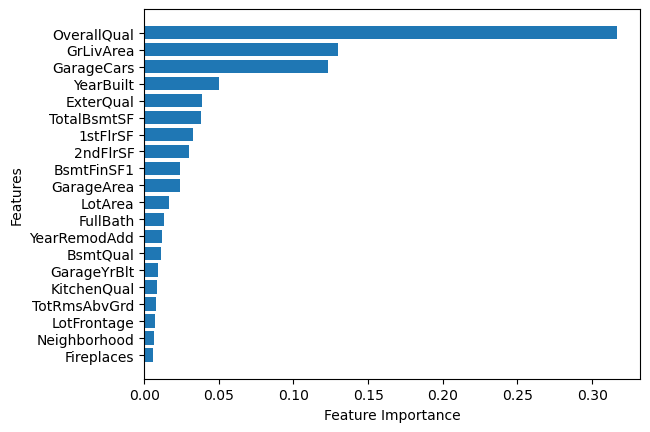

In [103]:
plot_features(X_train.columns, ideal_model.feature_importances_)

**Final challenge:** What other ML models could you try on our dataset? Hint: check out the regression section of this [map](data/ml_map.png) or try to look at something like CatBoost.ai or XGBoost.ai.

![map](data/ml_map.png)

In [138]:
%%time

from xgboost import XGBRegressor
from sklearn.datasets import load_iris

# # read data
# X_train, X_test, y_train, y_test = train_test_split(X, 
#                                                     y, 
#                                                     test_size=.2,
#                                                    )

# create model instance
bst = XGBRegressor(n_estimators=100,
                   max_depth=3,
                   learning_rate=0.1,
                   subsample=0.8,
                   colsample_bytree=0.8,
                   alpha=0,
#                    lambda=0,
                   objective='reg:squarederror',
                   eval_metric='rmse',
                   random_state=42)

# fit model
bst.fit(X_train, y_train)

# make predictions
bst_preds = bst.predict(X_test)
bst_preds

CPU times: total: 1.52 s
Wall time: 94.2 ms


array([259990.92 , 140859.8  , 212088.98 , 123606.28 , 195713.8  ,
       253874.06 , 144464.58 , 141450.55 ,  79706.664, 267296.34 ,
       134156.75 , 338957.56 , 126379.45 , 248511.81 , 126806.82 ,
        99279.24 , 194932.67 , 245599.28 ,  99353.85 , 262387.44 ,
       143255.19 , 186896.14 , 349859.8  , 136636.23 , 132493.22 ,
       136611.44 , 287072.84 , 184071.58 , 173660.84 , 195581.25 ,
       214828.   , 115926.945, 119233.516, 168543.53 , 111735.6  ,
        93427.49 ,  72672.6  , 113384.21 , 122541.78 , 443092.34 ,
       239395.31 ,  95571.3  , 415928.   , 246739.69 , 133126.36 ,
       141734.81 , 278751.7  , 141871.6  , 153705.3  , 392690.53 ,
       212615.84 , 151082.61 , 112446.16 , 509789.22 , 216572.77 ,
       235505.2  , 193786.88 , 118360.91 , 107413.8  , 184450.12 ,
       117410.14 , 154809.27 , 264333.75 , 158662.83 , 120718.89 ,
       284257.   , 211730.11 , 120399.59 , 131170.06 ,  62889.03 ,
       216257.61 , 337497.03 , 313841.1  , 236959.1  , 279859.

In [139]:
show_scores(bst)

{'Training MAE': 10750.335235177654,
 'Valid MAE': 12791.82722870291,
 'Training RMSE': 14869.110742963025,
 'Valid RMSE': 19621.29356488969,
 'Training R^2': 0.9646746083623736,
 'Valid R^2': 0.9498071984475915}

In [135]:
# Make predictions on the test data using the ideal model
bst_preds = bst.predict(df_test)
bst_preds

array([129030.195, 162322.55 , 196948.5  , ..., 190826.39 , 135360.06 ,
       195629.38 ], dtype=float32)

In [136]:
# Format XGBoost predictions into the same format Kaggle is after
bst_preds = pd.DataFrame()
bst_preds["Id"] = df_test["Id"]
bst_preds["SalePrice"] = bst_preds
bst_preds

# Export rs prediction data to .csv
bst_preds.to_csv("data/bst_test_predictions.csv",
                index=False)